<a href="https://colab.research.google.com/github/RafaelHPS/QuarentenaDados/blob/master/QuarentenaDados_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
imdb = pd.read_csv(r"https://raw.githubusercontent.com/RafaelHPS/QuarentenaDados/master/IMDB5000/movie_metadata.csv")

#Aula 03

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imdb_score) dos filmes em preto e branco e coloridos.

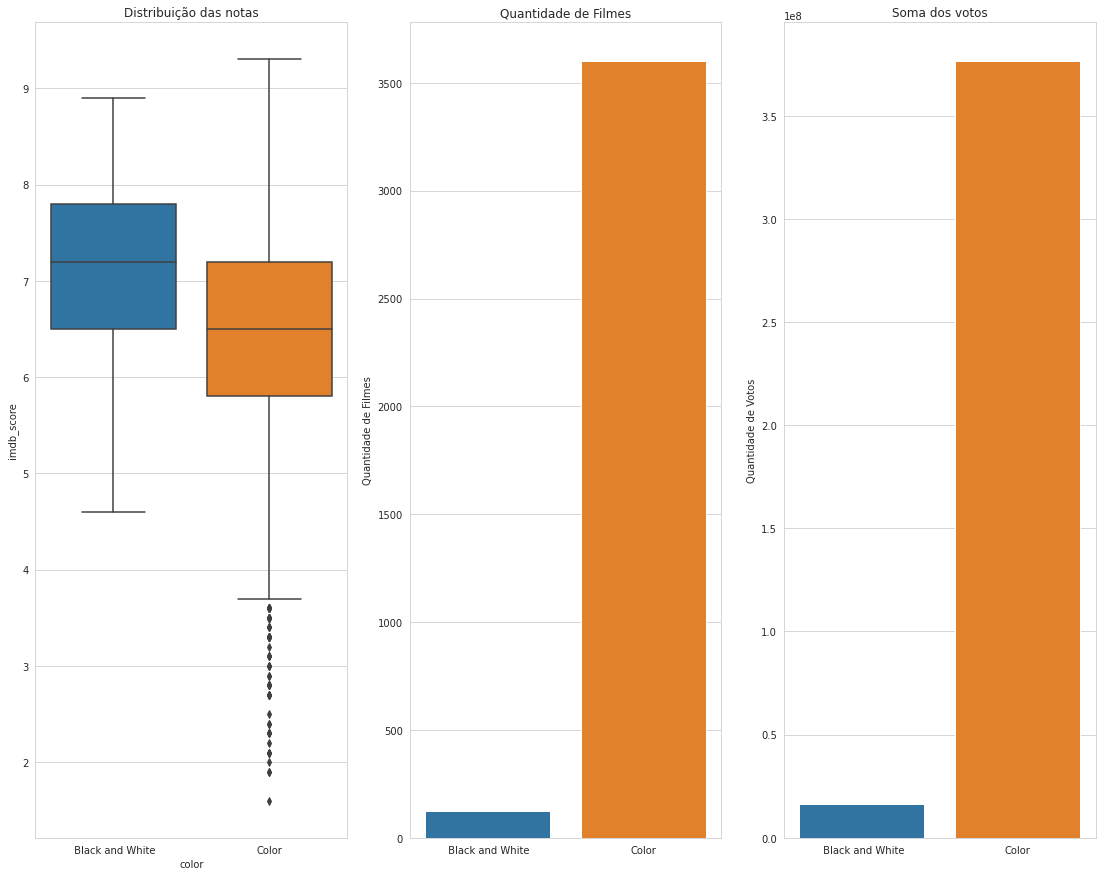

In [75]:
imdb = imdb.drop_duplicates()

sns.set_style("whitegrid")

filmes_color_bw = imdb.query("color in ('Color', ' Black and White')").dropna().sort_values(by='color')

fig, ax = plt.subplots(1,3,figsize=(19,15))

filmes_color_bw_plot = sns.boxplot(data=filmes_color_bw, x="color",y="imdb_score", ax = ax[0])
filmes_color_bw_plot.set_title("Distribuição das notas")

filmes_color_bw_qtd = filmes_color_bw.groupby(by="color").count().sort_index()
filmes_color_bw_bar = sns.barplot(data=filmes_color_bw_qtd, x= filmes_color_bw_qtd.index.to_list(),y="director_name", ax = ax[1])
filmes_color_bw_bar.set_ylabel("Quantidade de Filmes")
filmes_color_bw_bar.set_title("Quantidade de Filmes")

filmes_color_bw_qtdVotos = filmes_color_bw.groupby(by="color").sum().sort_index()
filmes_color_bw_bar_votos = sns.barplot(data=filmes_color_bw_qtdVotos, x= filmes_color_bw_qtdVotos.index.to_list(),y="num_voted_users", ax = ax[2])
filmes_color_bw_bar_votos.set_ylabel("Quantidade de Votos")
filmes_color_bw_bar_votos.set_title("Soma dos votos")

plt.show()


##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [47]:
imdb_usa = imdb.query("country == 'USA'")

imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

menor_lucro = imdb_usa.sort_values('lucro').iloc[0]

menor_lucro = menor_lucro.to_frame()
menor_lucro.columns = ['Description']

print(menor_lucro)

                                                                 Description
color                                                                  Color
director_name                                                 Andrew Stanton
num_critic_for_reviews                                                   462
duration                                                                 132
director_facebook_likes                                                  475
actor_3_facebook_likes                                                   530
actor_2_name                                                 Samantha Morton
actor_1_facebook_likes                                                   640
gross                                                            7.30587e+07
genres                                               Action|Adventure|Sci-Fi
actor_1_name                                                    Daryl Sabara
movie_title                                                     John Carter 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

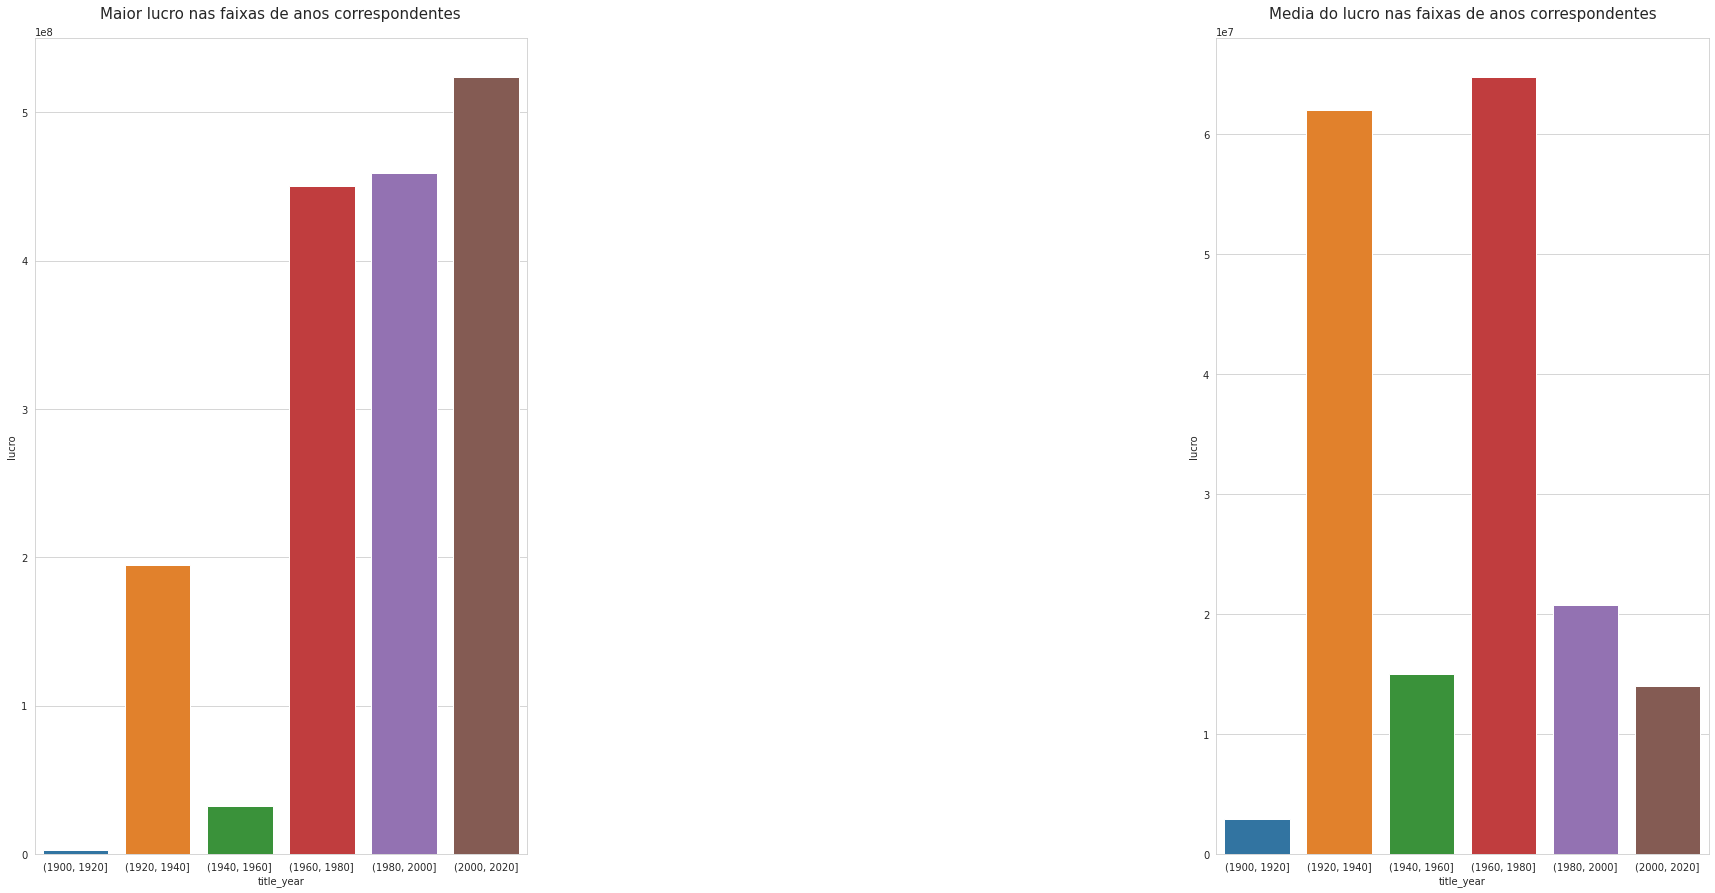

In [127]:
imdb_filmes_cada_20_anos = imdb_usa.groupby(pd.cut(imdb_usa["title_year"], np.arange(1900, 2020+1, 20)))['lucro'].max()

imdb_filmes_cada_20_anos = imdb_filmes_cada_20_anos.reset_index()

fig, ax = plt.subplots(1,3,figsize=(30,15))

imdb_filmes_cada_20_anos_plot = sns.barplot(data=imdb_filmes_cada_20_anos,x=imdb_filmes_cada_20_anos['title_year'],y=imdb_filmes_cada_20_anos['lucro'],ax=ax[0])
imdb_filmes_cada_20_anos_plot.set_title("Maior lucro nas faixas de anos correspondentes", fontsize=15,pad=20)

ax[1].axis("off")

imdb_filmes_cada_20_anos = imdb_usa.groupby(pd.cut(imdb_usa["title_year"], np.arange(1900, 2020+1, 20)))['lucro'].mean()
imdb_filmes_cada_20_anos = imdb_filmes_cada_20_anos.reset_index()
imdb_filmes_cada_20_anos_media = sns.barplot(data=imdb_filmes_cada_20_anos,x=imdb_filmes_cada_20_anos['title_year'],y=imdb_filmes_cada_20_anos['lucro'], ax=ax[2])
imdb_filmes_cada_20_anos_media.set_title("Media do lucro nas faixas de anos correspondentes", fontsize=15, pad=20)

plt.show()

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [131]:
dois_maiores_lucros_seg_guerra = imdb_usa.query("title_year > 1920 and title_year < 1945").sort_values(by='lucro', ascending = False).iloc[0:2]

dois_maiores_lucros_seg_guerra

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,194678278.0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [148]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
sera_woody_allen = gross_director.query('filmes_irmaos > 15 and filmes_irmaos < 20')

sera_woody_allen = sera_woody_allen.groupby('director_name').agg({'dindin':'sum', 'filmes_irmaos': 'count'}).reset_index()

sera_woody_allen

,director_name,dindin,filmes_irmaos
0,Spike Lee,3.285004e+08,16
1,Tim Burton,2.071275e+09,16
2,Woody Allen,1.947097e+08,18


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

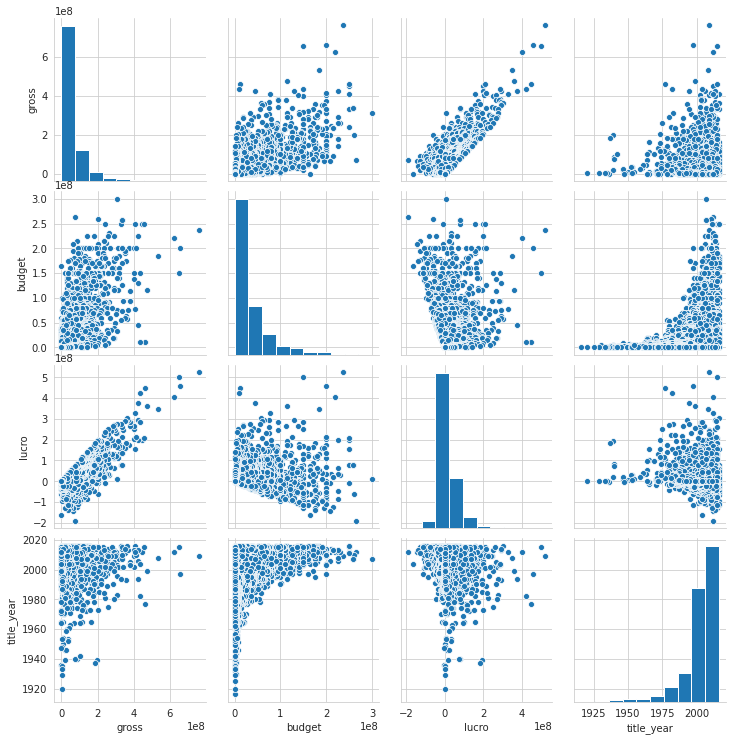

In [149]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [150]:
imdb_usa.query('title_year > 2000')[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.708622,0.770074,0.102319
budget,0.708622,1.000000,0.095558,0.059220
lucro,0.770074,0.095558,1.000000,0.028288
title_year,0.102319,0.059220,0.028288,1.000000


## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

<Figure size 1440x1440 with 0 Axes>

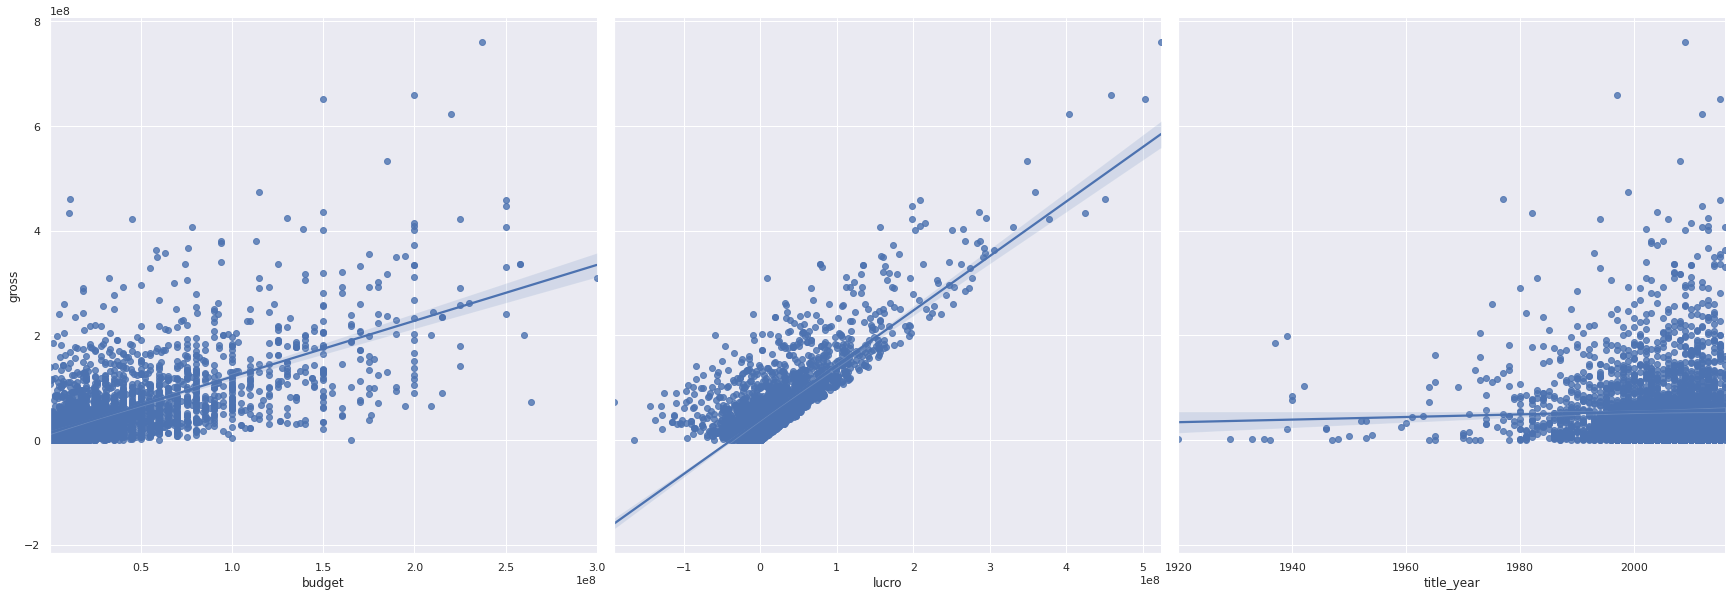

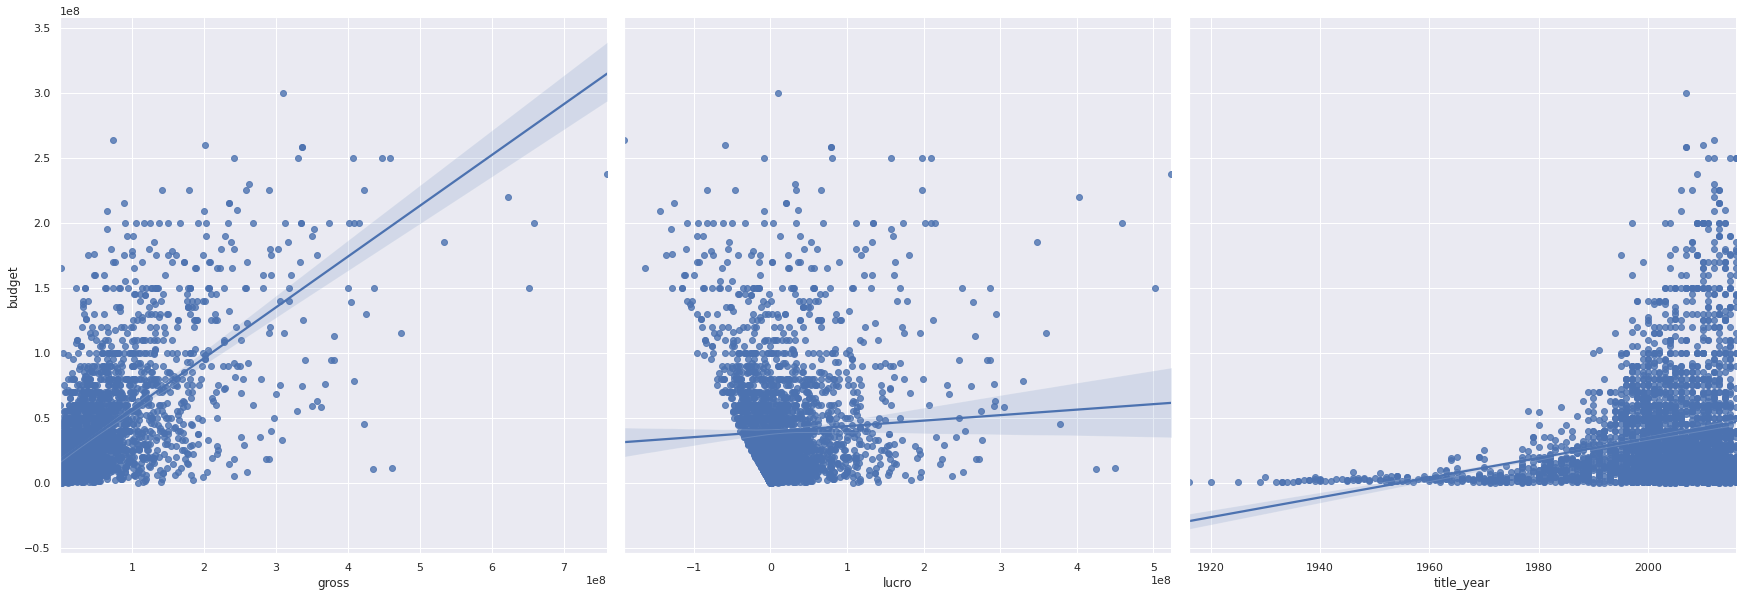

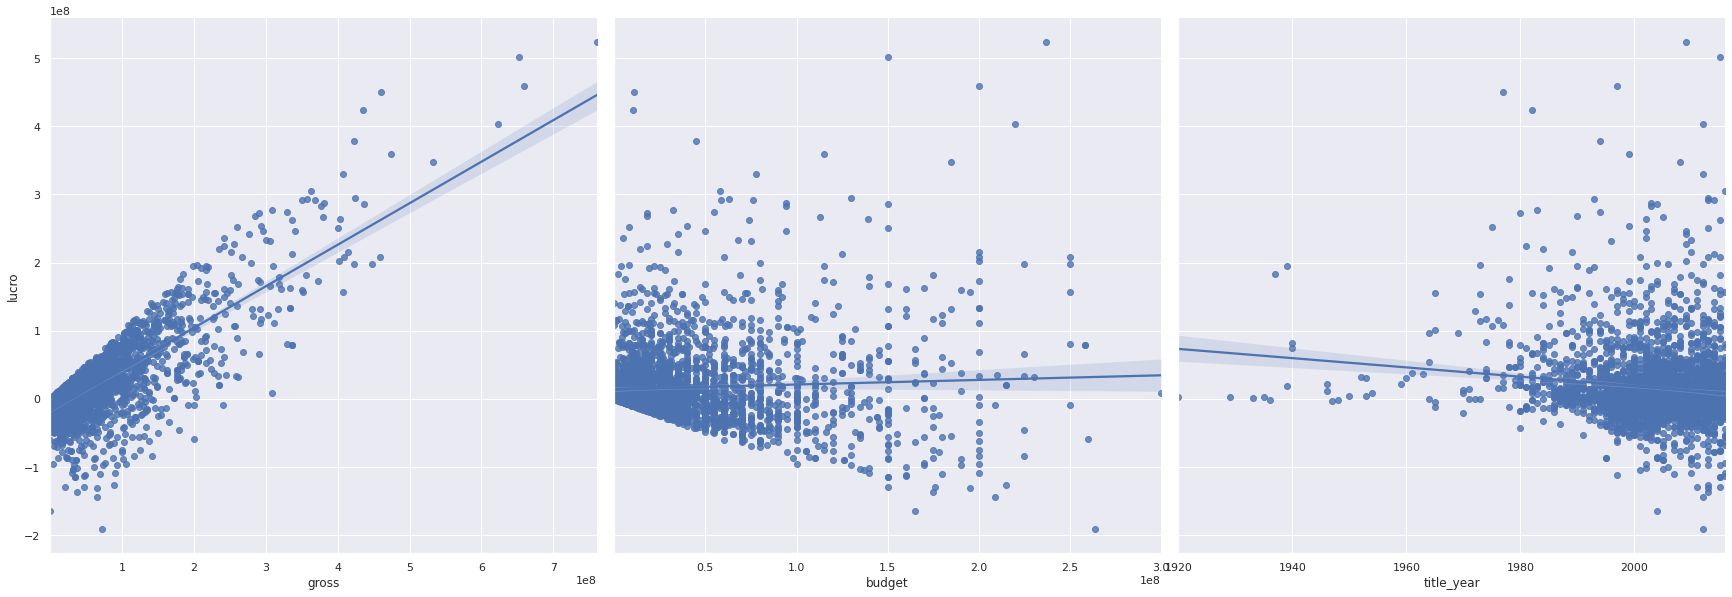

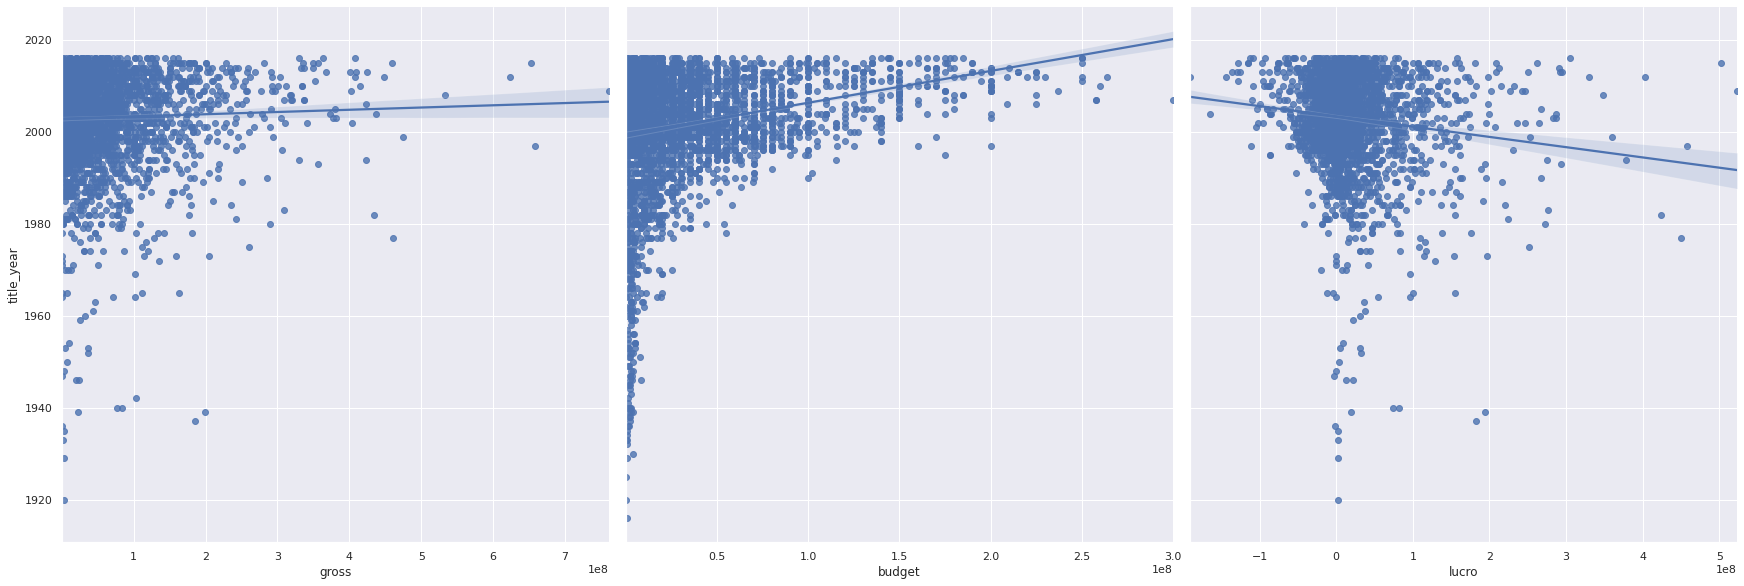

In [175]:
#sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

columns_corr_master = ["gross", "budget", "lucro", "title_year"]
columns_corr = columns_corr_master.copy()

plt.figure(figsize=(20,20))
for item in columns_corr_master:
  columns_corr.remove(item)
  plot_line = sns.pairplot(imdb_usa, x_vars=columns_corr, y_vars=[item], kind="reg", height=8)
  
  plt.show()
  columns_corr = columns_corr_master.copy()
  print('\n')
  

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


<Figure size 1440x1440 with 0 Axes>

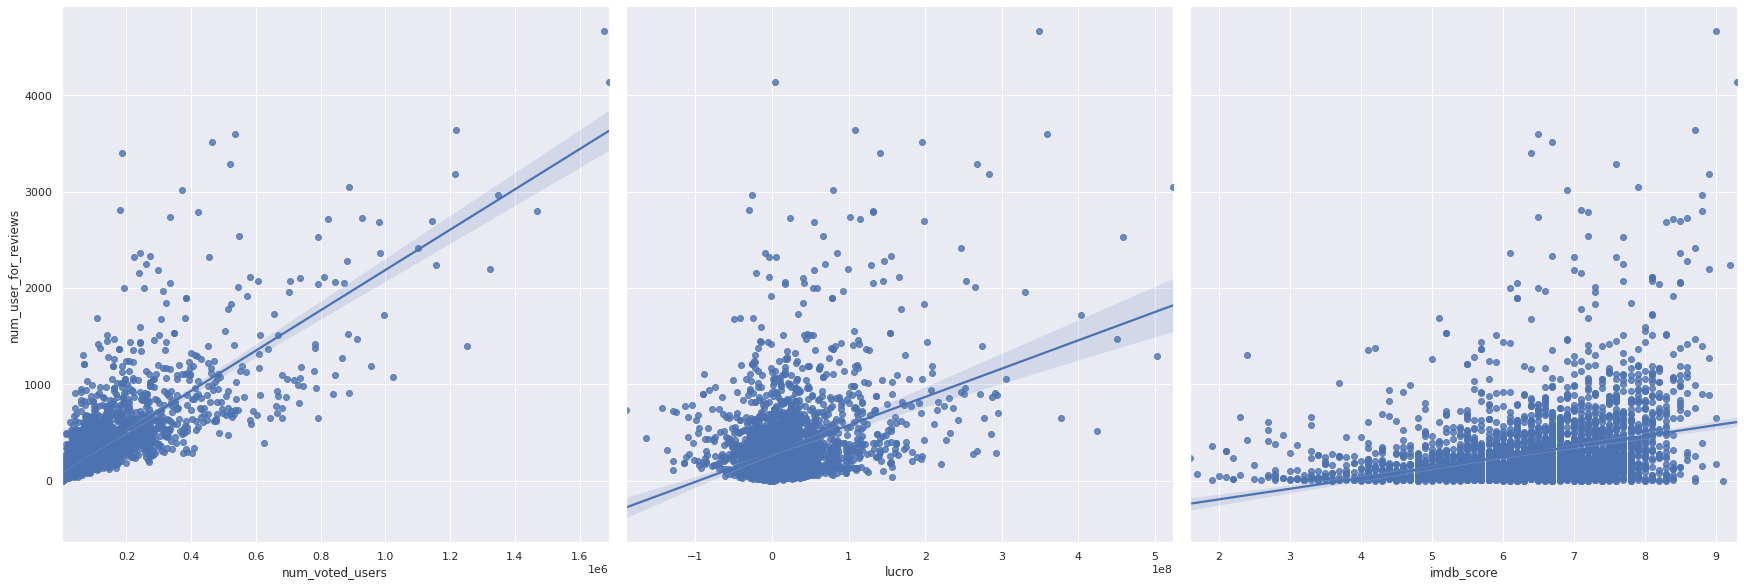

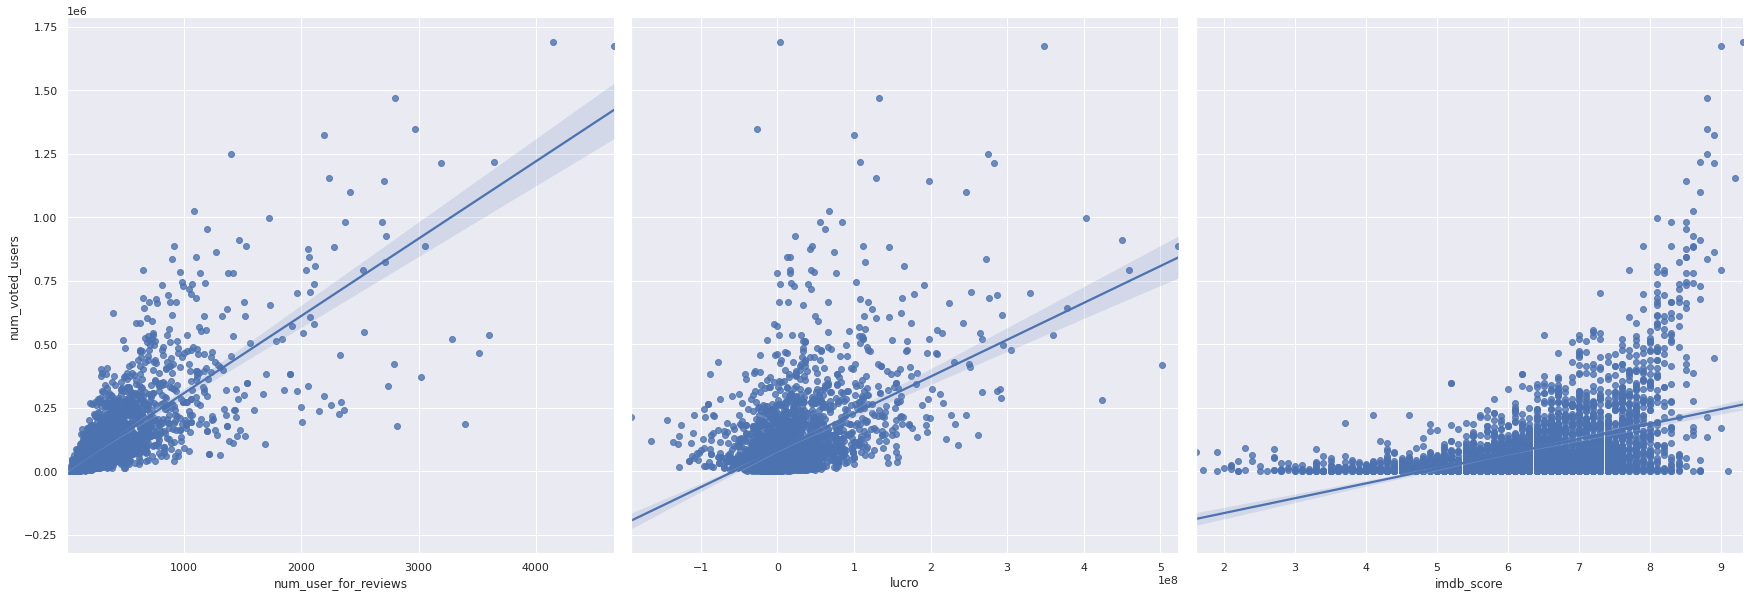

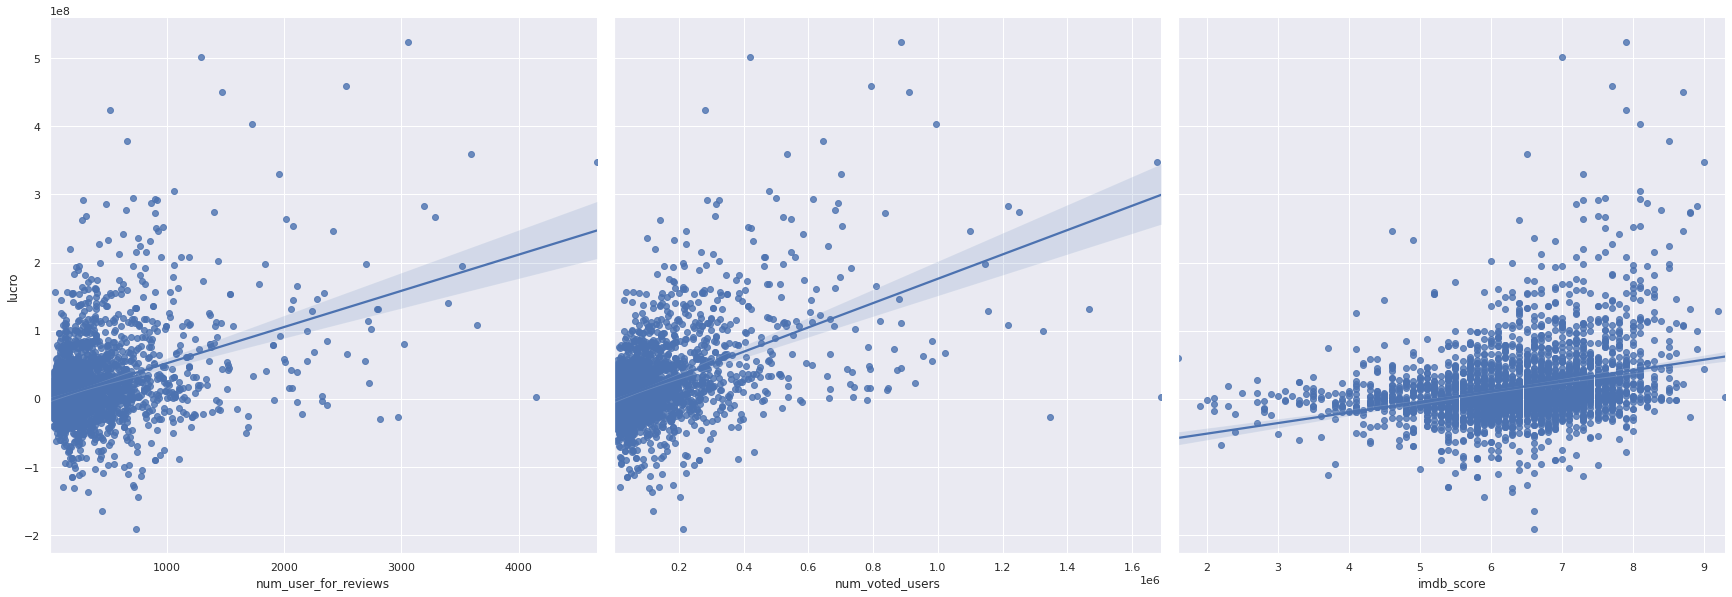

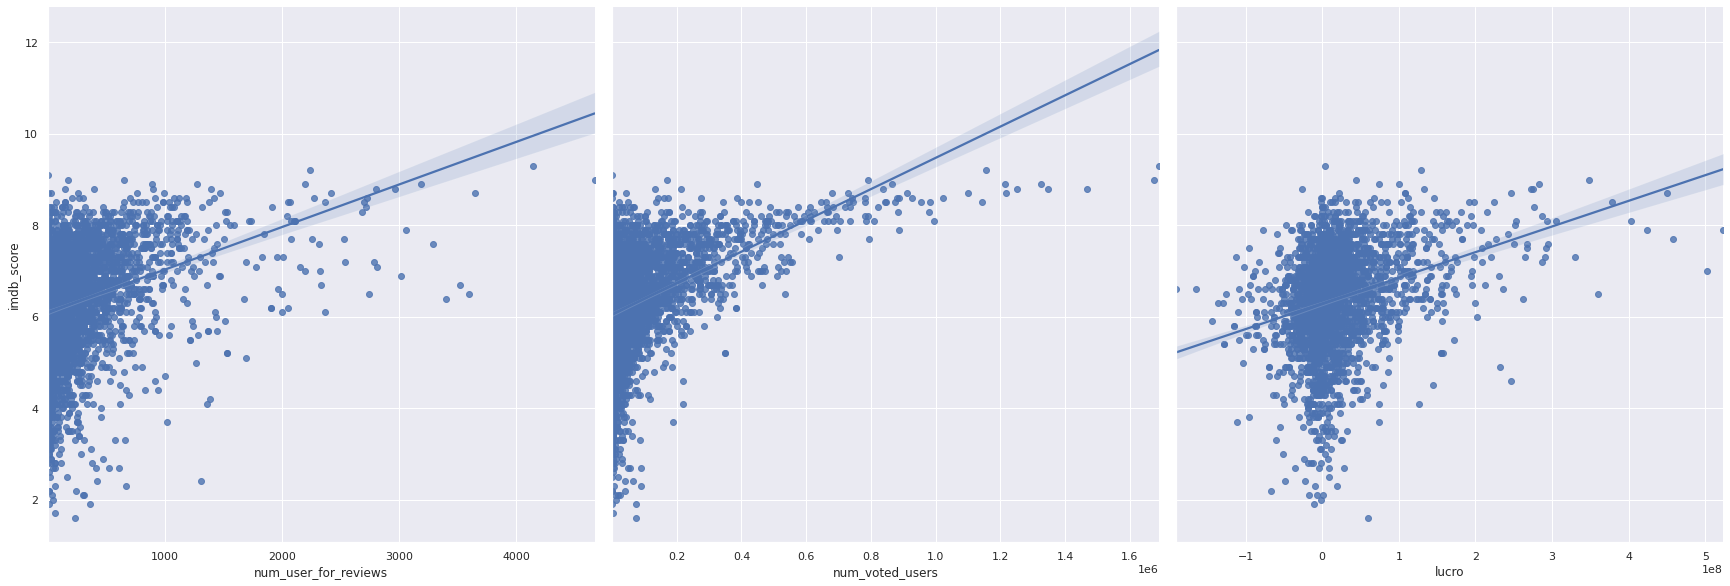

In [178]:
columns_corr_master_others = ["num_user_for_reviews", "num_voted_users", "lucro", "imdb_score"]
columns_corr_others = columns_corr_master_others.copy()

plt.figure(figsize=(20,20))
for item in columns_corr_master_others:
  columns_corr_others.remove(item)
  plot_line = sns.pairplot(imdb_usa, x_vars=columns_corr_others, y_vars=[item], kind="reg", height=8)
  
  plt.show()
  columns_corr_others = columns_corr_master_others.copy()
  print('\n')